In [5]:
import os
import sys

rootpath = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir, os.path.pardir))
sys.path.append(os.path.join(rootpath, "src"))

In [6]:
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

In [7]:
from sentence_benchmark.data import load_sts12

In [9]:
sts12 = load_sts12(os.path.join(rootpath, "data", "STS", "STS12-en-test"))

In [26]:
def preprocess(example):
    input_ids = tokenizer(example.input, return_attention_mask=False)["input_ids"]
    input_ids1, input_ids2 = input_ids[0], input_ids[1]
    return input_ids1, input_ids2, example.score
examples = [preprocess(x) for x in sts12["MSRpar"]]

In [23]:
import pandas as pd

In [27]:
df = pd.DataFrame(examples, columns=["input_ids1", "input_ids2", "score"])

In [28]:
df.head()

,input_ids1,input_ids2,score
0,"[0, 627, 936, 533, 40, 1266, 31378, 1022, 137,...","[0, 700, 26, 5, 936, 782, 7, 28, 17261, 137, 5...",4.4
1,"[0, 627, 806, 12, 462, 8988, 23473, 5946, 1446...","[0, 627, 4007, 2526, 359, 2129, 128, 29, 1764,...",0.8
2,"[0, 113, 24, 128, 29, 10, 1307, 909, 2295, 215...","[0, 113, 24, 128, 29, 10, 1307, 909, 2295, 215...",3.6
3,"[0, 8584, 2243, 40, 6009, 218, 5618, 1478, 26,...","[0, 113, 939, 206, 89, 128, 29, 10, 745, 2123,...",3.4
4,"[0, 705, 1879, 19724, 327, 1367, 112, 4, 466, ...","[0, 179, 92, 1423, 9657, 2156, 748, 1879, 1972...",1.4


In [33]:
def compute_overlap_proportion(row):
    input_ids1 = set(row["input_ids1"])
    input_ids2 = set(row["input_ids2"])
    return len(input_ids1 & input_ids2) / len(input_ids1 | input_ids2)

df["overlap_proportion"] = df.apply(compute_overlap_proportion, axis=1)

input_ids1    [0, 627, 936, 533, 40, 1266, 31378, 1022, 137,...
input_ids2    [0, 700, 26, 5, 936, 782, 7, 28, 17261, 137, 5...
score                                                       4.4
Name: 0, dtype: object
input_ids1    [0, 627, 806, 12, 462, 8988, 23473, 5946, 1446...
input_ids2    [0, 627, 4007, 2526, 359, 2129, 128, 29, 1764,...
score                                                       0.8
Name: 1, dtype: object
input_ids1    [0, 113, 24, 128, 29, 10, 1307, 909, 2295, 215...
input_ids2    [0, 113, 24, 128, 29, 10, 1307, 909, 2295, 215...
score                                                       3.6
Name: 2, dtype: object
input_ids1    [0, 8584, 2243, 40, 6009, 218, 5618, 1478, 26,...
input_ids2    [0, 113, 939, 206, 89, 128, 29, 10, 745, 2123,...
score                                                       3.4
Name: 3, dtype: object
input_ids1    [0, 705, 1879, 19724, 327, 1367, 112, 4, 466, ...
input_ids2    [0, 179, 92, 1423, 9657, 2156, 748, 1879, 1972...
score       

Name: 170, dtype: object
input_ids1    [0, 10669, 361, 1589, 365, 2156, 39277, 10147,...
input_ids2    [0, 22854, 10147, 26, 856, 5605, 3525, 11, 156...
score                                                       3.0
Name: 171, dtype: object
input_ids1    [0, 11762, 6320, 1368, 3937, 1344, 1236, 338, ...
input_ids2    [0, 627, 2470, 13, 1368, 3937, 1344, 1236, 338...
score                                                       4.5
Name: 172, dtype: object
input_ids1    [0, 627, 881, 2593, 1458, 25, 444, 25, 16157, ...
input_ids2    [0, 627, 881, 2593, 1458, 25, 444, 25, 16157, ...
score                                                       3.5
Name: 173, dtype: object
input_ids1    [0, 102, 92, 22637, 2109, 693, 34, 555, 5, 78,...
input_ids2    [0, 102, 5356, 12, 180, 12, 279, 3072, 30301, ...
score                                                       1.5
Name: 174, dtype: object
input_ids1    [0, 35685, 4, 6964, 607, 8, 475, 338, 4, 741, ...
input_ids2    [0, 17282, 607, 8, 741, 43710

Name: 375, dtype: object
input_ids1    [0, 2629, 32712, 32, 2800, 30, 1855, 33965, 27...
input_ids2    [0, 611, 33965, 2777, 3748, 39605, 67, 323, 29...
score                                                       3.2
Name: 376, dtype: object
input_ids1    [0, 627, 394, 880, 39, 1901, 30, 17790, 5, 488...
input_ids2    [0, 23009, 2156, 959, 2156, 67, 21569, 66, 23,...
score                                                       3.2
Name: 377, dtype: object
input_ids1    [0, 29, 853, 6125, 5723, 632, 285, 3188, 2156,...
input_ids2    [0, 29, 853, 6125, 682, 880, 3406, 632, 285, 3...
score                                                       3.4
Name: 378, dtype: object
input_ids1    [0, 113, 939, 5505, 20024, 475, 182, 2602, 9, ...
input_ids2    [0, 113, 939, 128, 119, 182, 2602, 9, 5, 2286,...
score                                                       3.2
Name: 379, dtype: object
input_ids1    [0, 31636, 130, 538, 2261, 2156, 8447, 5557, 3...
input_ids2    [0, 12265, 5557, 329, 47129, 

Name: 584, dtype: object
input_ids1    [0, 627, 13174, 2156, 5, 6910, 4, 41906, 856, ...
input_ids2    [0, 627, 6910, 4, 41906, 41906, 6712, 2156, 44...
score                                                      3.75
Name: 585, dtype: object
input_ids1    [0, 7354, 4, 784, 8865, 784, 18768, 8, 453, 9,...
input_ids2    [0, 7354, 4, 784, 8865, 784, 18768, 8, 97, 192...
score                                                       3.5
Name: 586, dtype: object
input_ids1    [0, 627, 4221, 1171, 68, 204, 4, 134, 153, 11,...
input_ids2    [0, 2911, 12042, 13980, 128, 6386, 74, 120, 68...
score                                                       4.5
Name: 587, dtype: object
input_ids1    [0, 9983, 117, 2834, 74, 3549, 24, 13, 122, 47...
input_ids2    [0, 405, 74, 185, 130, 2834, 7, 3549, 5, 7678,...
score                                                     3.667
Name: 588, dtype: object
input_ids1    [0, 12465, 34782, 9545, 31, 3330, 749, 2156, 2...
input_ids2    [0, 12465, 34782, 9545, 31, 3

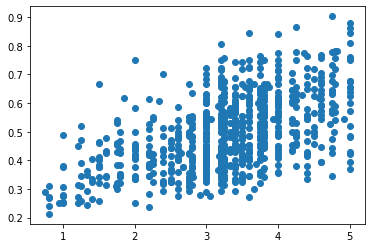

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(df["score"].tolist(), df["overlap_proportion"].tolist())

In [41]:
df[df["score"] > 4].sort_values(by="overlap_proportion")

,input_ids1,input_ids2,score,overlap_proportion
0,"[0, 627, 936, 533, 40, 1266, 31378, 1022, 137,...","[0, 700, 26, 5, 936, 782, 7, 28, 17261, 137, 5...",4.40,0.333333
207,"[0, 179, 2081, 2156, 1926, 449, 33594, 74, 28,...","[0, 113, 11, 671, 52, 1057, 1926, 449, 33594, ...",4.75,0.346154
747,"[0, 281, 233, 9, 39, 432, 2156, 475, 338, 4, 2...","[0, 417, 4097, 2424, 1851, 2981, 1507, 7, 1186...",4.40,0.354839
540,"[0, 417, 27947, 40, 652, 1900, 1103, 2156, 854...","[0, 3865, 859, 26, 385, 27947, 40, 28, 1340, 1...",5.00,0.368421
555,"[0, 5016, 38636, 33, 20872, 14, 5, 809, 128, 2...","[0, 25017, 6563, 21, 716, 15, 6116, 14, 39913,...",4.25,0.379310
...,...,...,...,...
84,"[0, 5016, 38636, 224, 65, 50, 258, 2786, 189, ...","[0, 5016, 38636, 26, 14, 65, 50, 258, 9, 5, 27...",5.00,0.846154
475,"[0, 25515, 9724, 14962, 34, 5, 232, 128, 29, 1...","[0, 5632, 204, 4, 406, 153, 82, 11256, 19, 136...",5.00,0.862069
41,"[0, 33063, 449, 5022, 282, 677, 2156, 1044, 9,...","[0, 33063, 449, 5022, 282, 677, 2156, 1044, 9,...",4.25,0.864865
593,"[0, 463, 122, 24, 128, 29, 932, 37, 1072, 7, 2...","[0, 463, 122, 24, 128, 29, 932, 37, 1072, 7, 2...",5.00,0.878788
